In [38]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_pickle("results.pkl")
df["wsp/point"] = df["wsp_count_2.0"] / df["num_points"]
df

,num_points,opt_len,nn_len,untouched_len,nwsp5_2_len,nwsp7_len,nwsp9_len,nwsp5_len,wsp_count_2.0,wsp/point
name,,,,,,,,,,
a280,280,2586.769648,3161.003928,4.847061e+03,NaN,NaN,NaN,NaN,2571,9.182143
ara238025,238025,NaN,759149.842377,1.176390e+06,NaN,NaN,NaN,NaN,3032365,12.739691
bby34656,34656,NaN,125383.275407,1.966541e+05,NaN,NaN,NaN,NaN,412676,11.907779
bbz25234,25234,NaN,87720.344055,1.414553e+05,NaN,NaN,NaN,NaN,299703,11.876952
bch2762,2762,NaN,10733.617810,1.624823e+04,NaN,NaN,NaN,NaN,28611,10.358798
...,...,...,...,...,...,...,...,...,...,...
xua3937,3937,NaN,14177.249409,2.054156e+04,NaN,NaN,NaN,NaN,42157,10.707899
xva2993,2993,NaN,10942.207468,1.608712e+04,NaN,NaN,NaN,NaN,32046,10.706983
xvb13584,13584,37774.934821,46586.545388,7.446251e+04,NaN,NaN,NaN,NaN,160624,11.824499


198


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          wsp_count_2.0   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              5687.
Date:                Mon, 08 Jan 2024   Prob (F-statistic):                   2.83e-147
Time:                        20:23:04   Log-Likelihood:                         -2457.8
No. Observations:                 198   AIC:                                      4918.
Df Residuals:                     197   BIC:                                      4921.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
num_points    13.7066      0.182     75.414      0.000      13.348      14.065
==============================================================================
Omnibus:                      159.395   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2241.174
Skew:                           2.987   Prob(JB):                         0.00
Kurtosis:                      18.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

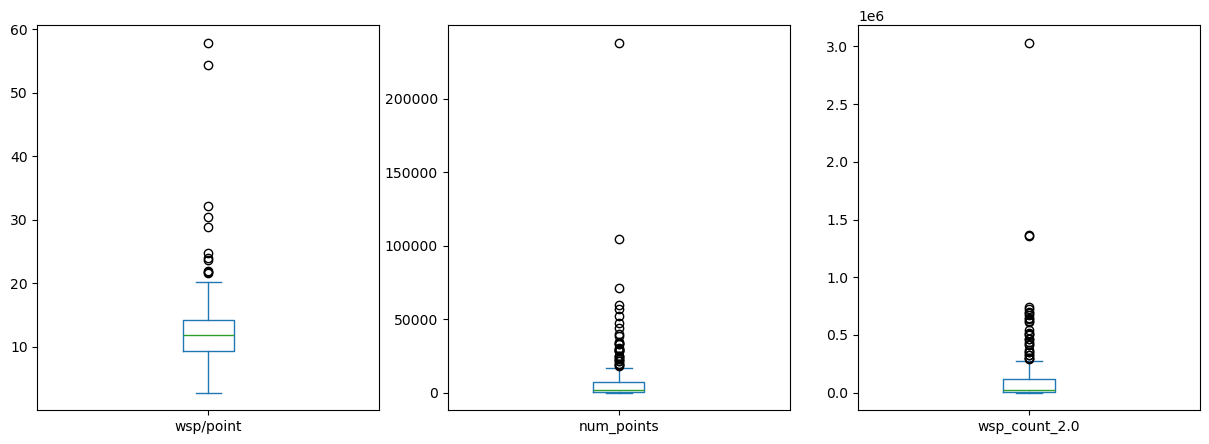

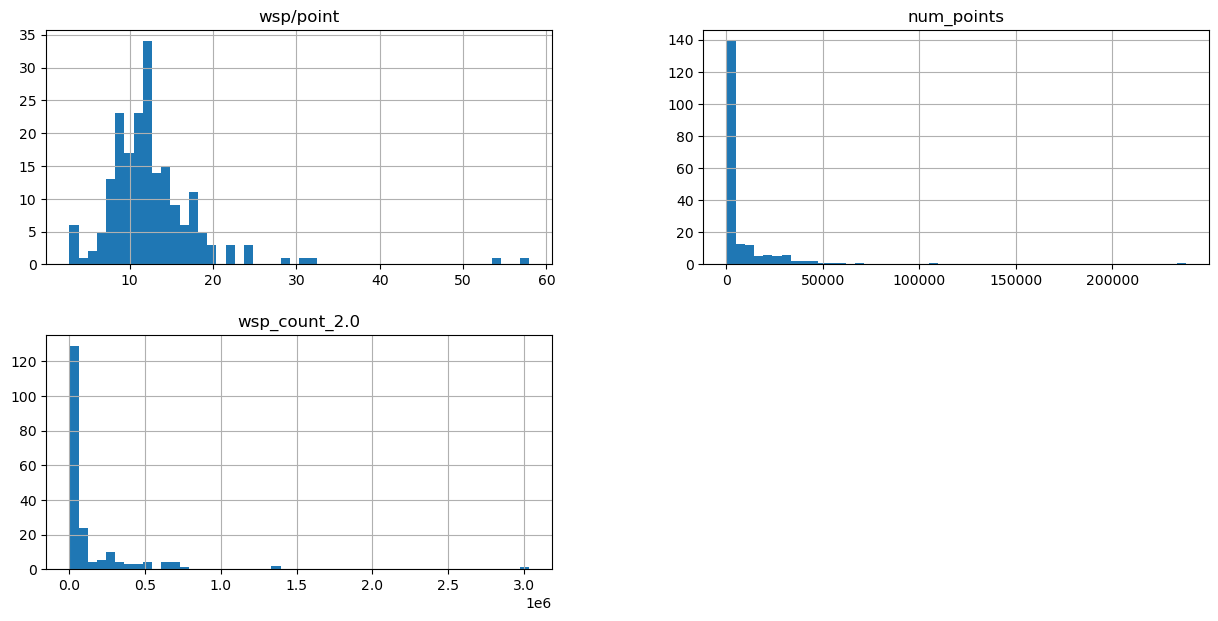

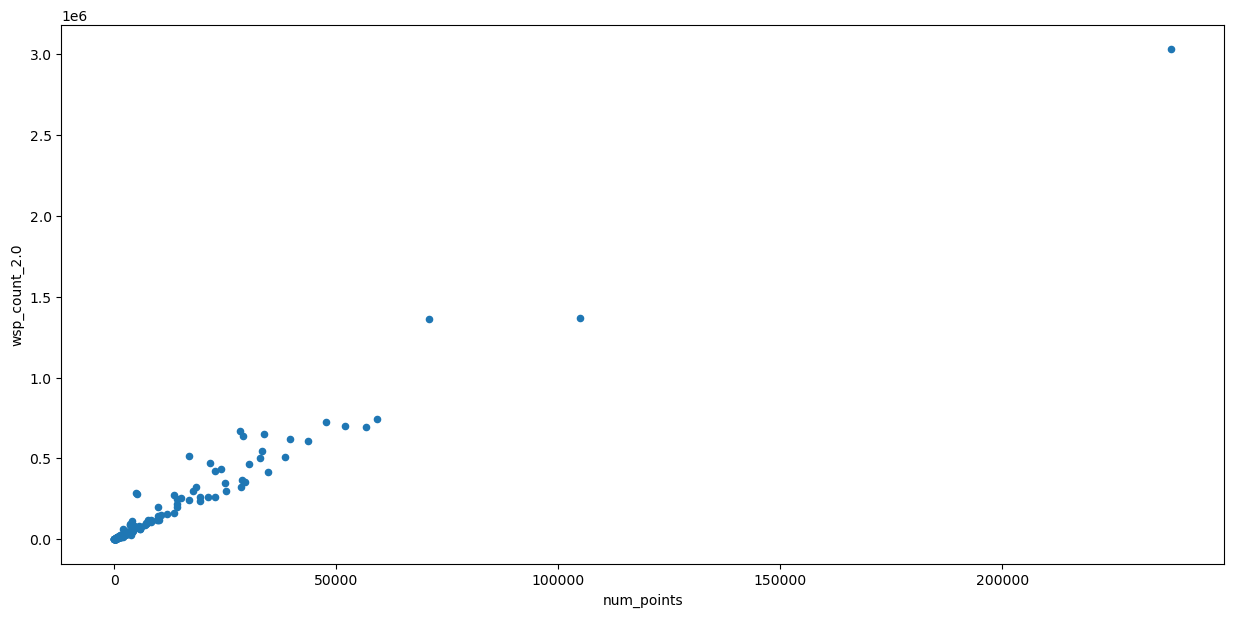

In [39]:
# Remove NAN wsp_counts and tell cells their format
df = df[~df['wsp_count_2.0'].isna()]
print(len(df))

fig, axs = plt.subplots(1,3, figsize=(15,5))
df["wsp/point"].plot.box(ax=axs[0])
df["num_points"].plot.box(ax=axs[1])
df["wsp_count_2.0"].plot.box(ax=axs[2])

df.hist(column=["wsp/point", "num_points", "wsp_count_2.0"], bins=50, figsize=(15,7))

df.plot.scatter("num_points", "wsp_count_2.0", figsize=(15,7)) # TODO: make this graph look better

results = sm.OLS(df["wsp_count_2.0"].astype(int), df["num_points"].astype(int)).fit()
results.summary()

In [40]:
df = df[~df['opt_len'].isna()] # remove problems without optimal lens

In [41]:
df["nn error"] = df["nn_len"] / df["opt_len"]
print(len(df))
df["num_points"].describe()

86


/var/folders/_t/4_m8pb3d3xs763zf2ztl10k40000gn/T/ipykernel_35151/4293177761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nn error"] = df["nn_len"] / df["opt_len"]


count           86.0
mean     5728.453488
std      9974.410769
min             29.0
25%           383.75
50%           1700.0
75%          7610.75
max          71009.0
Name: num_points, dtype: Float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               nn error   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                              653.3
Date:                Mon, 08 Jan 2024   Prob (F-statistic):                    1.15e-41
Time:                        20:24:11   Log-Likelihood:                         -49.058
No. Observations:                  86   AIC:                                      100.1
Df Residuals:                      85   BIC:                                      102.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wsp/point      0.0892      0.003     25.560      0.000       0.082       0.096
==============================================================================
Omnibus:                       40.029   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.636
Skew:                          -1.549   Prob(JB):                     4.71e-26
Kurtosis:                       7.791   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

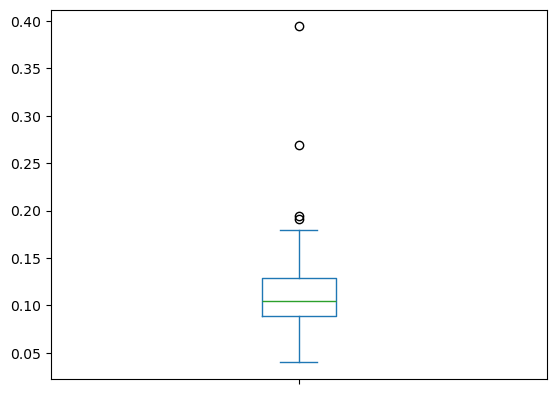

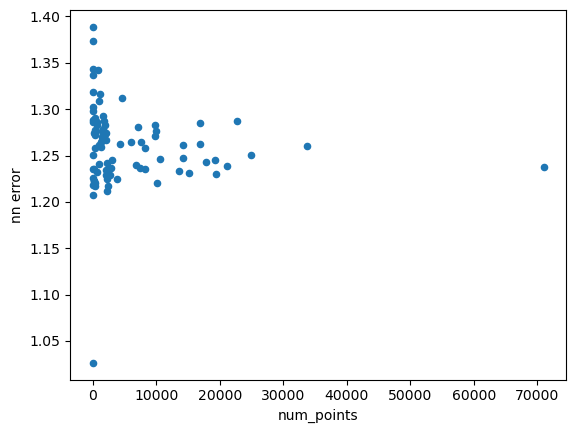

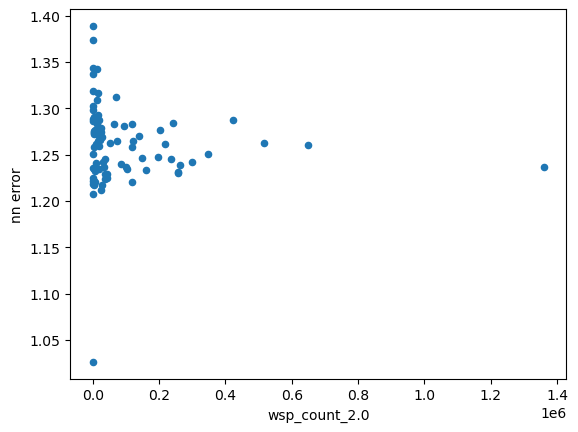

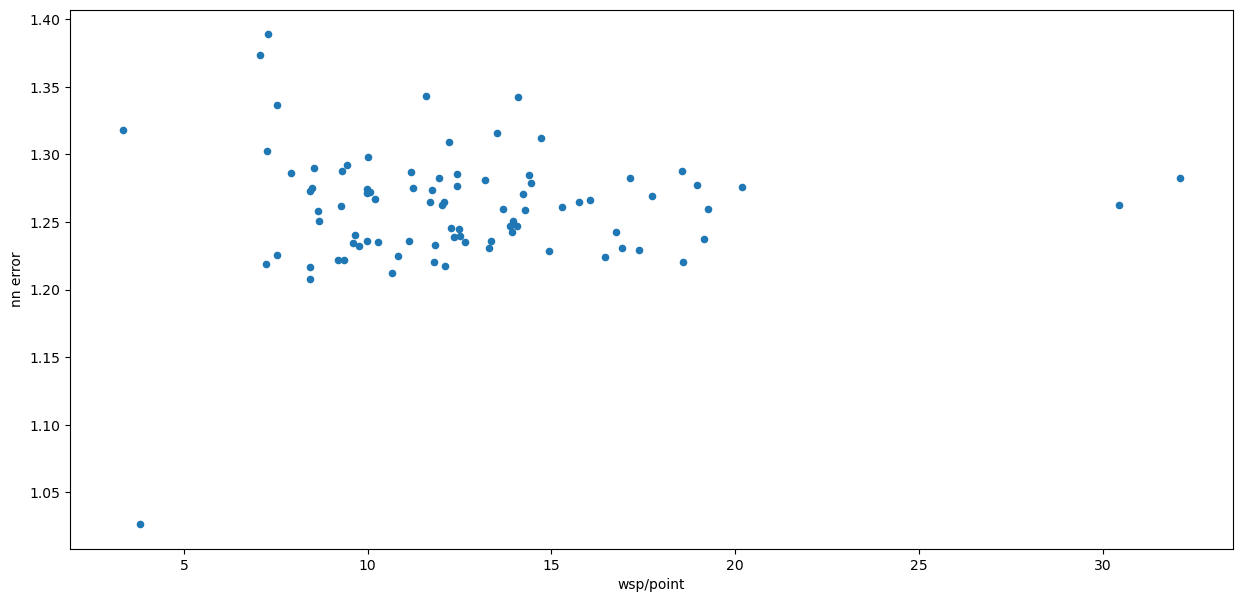

In [42]:
# df = df.drop("dj38") # outlier screws up how graph renders r^2 is 0.88 w/o them
# df = df.drop("dkd1973")

(df["nn error"] / df["wsp/point"]).plot.box()

df.plot.scatter("num_points", "nn error")
df.plot.scatter("wsp_count_2.0", "nn error")
fig, ax = plt.subplots(figsize=(15,7))
df.plot.scatter("wsp/point", "nn error", ax=ax)

# for k, v in df.iterrows():
#     ax.annotate(k, (v["wsp/point"], v["nn error"]))

results = sm.OLS(df["nn error"].astype(float), df["wsp/point"].astype(float)).fit()
results.summary()